----------------------------
# Sesión 6: Modelaje estadístico (Regresión Lineal)
----------------------------

## Importaciones

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Datos

Estos datos de muestra son de ISLR. Muestra las ventas (en miles de unidades) de un producto en particular en función de los presupuestos de publicidad (en miles de dólares) para los medios de televisión, radio y periódicos.

In [ ]:
df = pd.read_csv("Advertising.csv")

In [ ]:
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

**¿Existe una relación entre el gasto total en publicidad y las ventas?**

In [ ]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

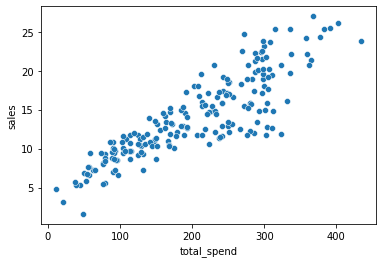

In [ ]:
sns.scatterplot(x='total_spend',y='sales',data=df)

## Línea de mínimos cuadrados

Fórmulas completas es Wikipedia: https://en.wikipedia.org/wiki/Linear_regression ,así como la lectura ISLR.

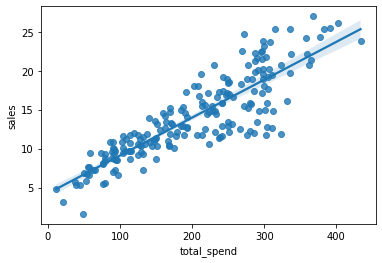

In [ ]:
# Básicamente, queremos averiguar cómo crear esta línea.
sns.regplot(x='total_spend',y='sales',data=df)

$$y=mx+b$$

$$ \hat{y} = \beta_0 + \beta_1X$$

En mayúsculas para indicar que estamos tratando con una matriz de valores, tenemos una matriz conocida de etiquetas (números de ventas) Y y una matriz conocida de gastos totales (X). Vamos a resolver los coeficientes *beta*, que a medida que nos expandimos a más de una sola característica, serán importantes para comprender qué características tienen el mayor poder predictivo. Usamos "y" para indicar que "y" es una predicción o estimación, y sería una etiqueta verdadera/valor conocido.

In [ ]:
X = df['total_spend']
y = df['sales']

In [ ]:
help(np.polyfit)

In [ ]:
# Least squares polynomial fit
# Devuelve la orden más alta coeficiento primero
m , b = np.polyfit(X,y,1)

In [ ]:
display(m)
display(b)

0.04868787931904817

4.243028216036326

In [ ]:
# Posibles presupuestos de gastos futuros
potential_spend = np.linspace(0,500,100)

In [ ]:
predicted_sales =  m * potential_spend + b

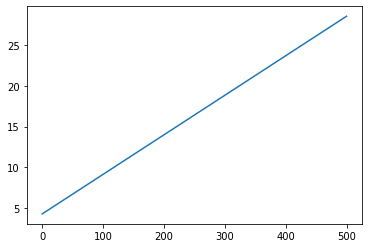

In [ ]:
plt.plot(potential_spend,predicted_sales)

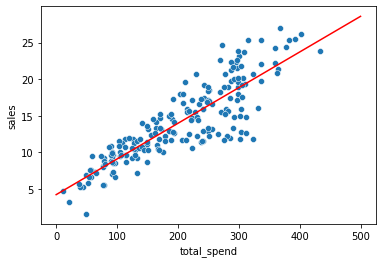

In [ ]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')

**Nuestra próxima campaña publicitaria tendrá un gasto total de $200, ¿cuántas unidades esperamos vender como resultado de esto?**

In [ ]:
spend = 200
predicted_sales =  m * spend + b

In [ ]:
predicted_sales

13.98060407984596

## Sobreajuste, ajuste insuficiente y medición del rendimiento

Observe que ajustamos a order=1, esencialmente una línea recta, podemos comenzar a explorar órdenes más altos, pero ¿un orden más alto significa un mejor ajuste general? ¿Es posible encajar demasiado? ¿Demasiado poco? ¿Cómo sabríamos y cómo definimos un buen ajuste?

In [ ]:
a, b, c, d = np.polyfit(X,y,3)

In [ ]:
# Posibles presupuestos de gastos futuros
potential_spend = np.linspace(0,500,100)

In [ ]:
predicted_sales =   a*potential_spend**3 + b*potential_spend**2 + c*potential_spend**1 + d

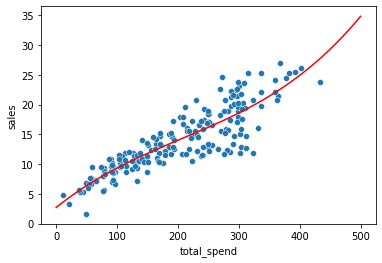

In [ ]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')

## Funciones múltiples

Los datos reales tenían 3 características, no todo en gasto total, ¿esto nos permitiría repetir el proceso y tal vez obtener un resultado más preciso?

In [ ]:
X = df[['TV','radio','newspaper']]
y = df['sales']

In [ ]:
# Tenga en cuenta que aquí estamos pasando 3 que coincide con 3 características únicas, por lo que aún no somos polinómicos
np.polyfit(X,y,1)

TypeError: ignored

**¡Polyfit solo funciona con una matriz 1D X! Tendremos que pasar a una biblioteca más potente...**

### Funciones múltiples (N-dimensiones)

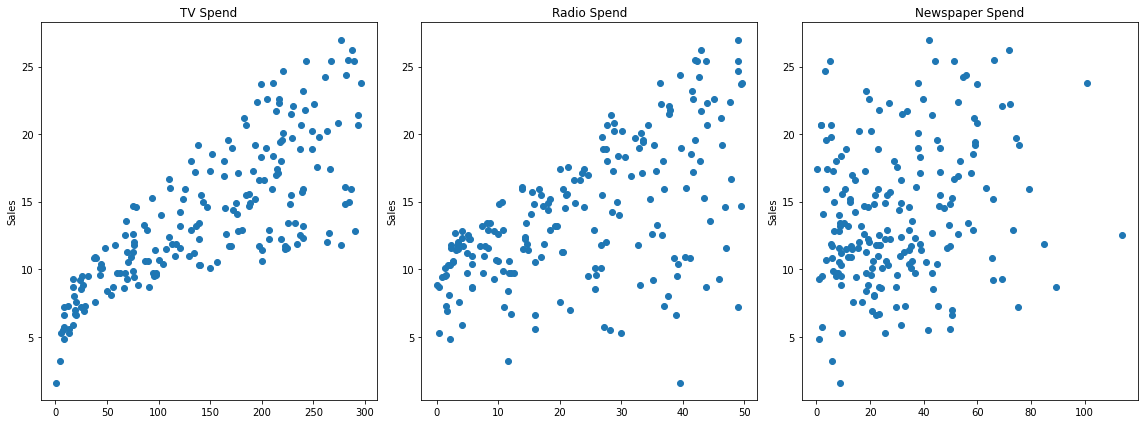

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

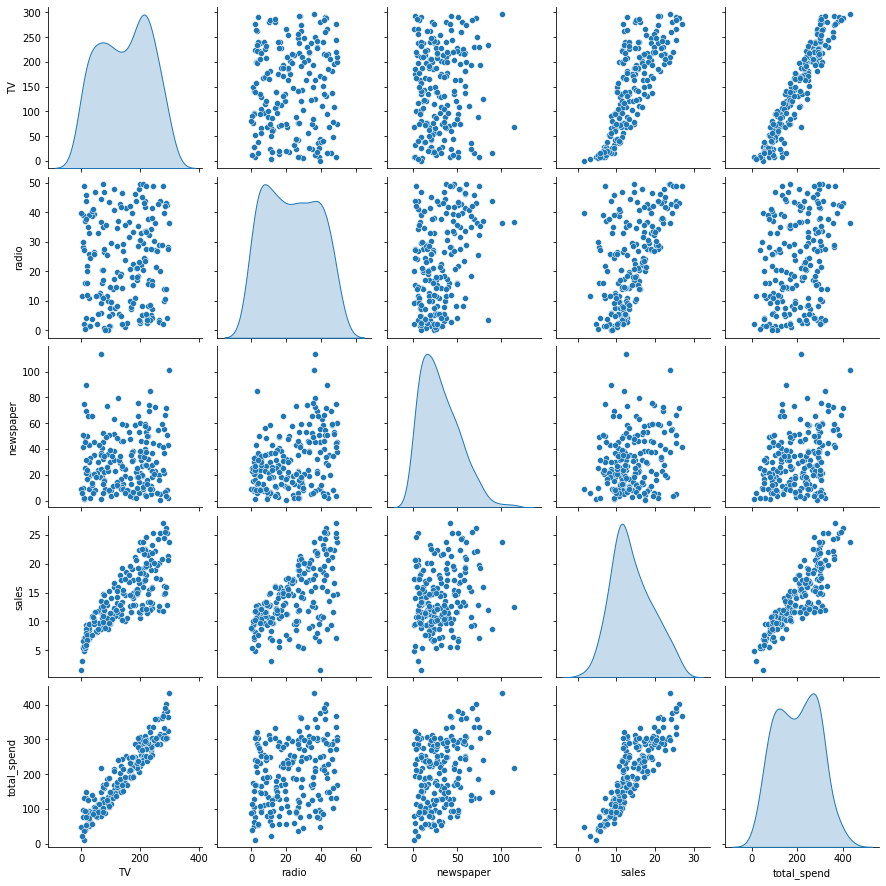

In [ ]:
# Relaciones entre funciones
sns.pairplot(df,diag_kind='kde')

## Introducción a SciKit Learn

In [ ]:
X = df.drop('sales',axis=1)
y = df['sales']

## División de conjuntos de pruebas y entrenamiento

pip install -U scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
X_train

TV  radio  newspaper  total_spend
85   193.2   18.4       65.7        277.3
183  287.6   43.0       71.8        402.4
127   80.2    0.0        9.2         89.4
53   182.6   46.2       58.7        287.5
100  222.4    4.3       49.8        276.5
..     ...    ...        ...          ...
63   102.7   29.6        8.4        140.7
70   199.1   30.6       38.7        268.4
81   239.8    4.1       36.9        280.8
11   214.7   24.0        4.0        242.7
95   163.3   31.6       52.9        247.8

[140 rows x 4 columns]

In [ ]:
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [ ]:
X_test

TV  radio  newspaper  total_spend
37    74.7   49.4       45.7        169.8
109  255.4   26.9        5.5        287.8
31   112.9   17.4       38.6        168.9
89   109.8   47.8       51.4        209.0
66    31.5   24.6        2.2         58.3
119   19.4   16.0       22.3         57.7
54   262.7   28.8       15.9        307.4
74   213.4   24.6       13.1        251.1
145  140.3    1.9        9.0        151.2
142  220.5   33.2       37.9        291.6
148   38.0   40.3       11.9         90.2
112  175.7   15.4        2.4        193.5
174  222.4    3.4       13.1        238.9
55   198.9   49.4       60.0        308.3
141  193.7   35.4       75.6        304.7
149   44.7   25.8       20.6         91.1
25   262.9    3.5       19.5        285.9
34    95.7    1.4        7.4        104.5
170   50.0   11.6       18.4         80.0
39   228.0   37.7       32.0        297.7
172   19.6   20.1       17.0         56.7
153  171.3   39.7       37.7        248.7
175  276.9   48.9       41.8        367.6
61   261.3   42.7       54.7        358.7
65    69.0    9.3        0.9         79.2
50   199.8    3.1       34.6        237.5
42   293.6   27.7        1.8        323.1
129   59.6   12.0       43.1        114.7
179  165.6   10.0       17.6        193.2
2     17.2   45.9       69.3        132.4
12    23.8   35.1       65.9        124.8
133  219.8   33.5       45.1        298.4
90   134.3    4.9        9.3        148.5
22    13.2   15.9       49.6         78.7
41   177.0   33.4       38.7        249.1
32    97.2    1.5       30.0        128.7
125   87.2   11.8       25.9        124.9
196   94.2    4.9        8.1        107.2
158   11.7   36.9       45.2         93.8
180  156.6    2.6        8.3        167.5
16    67.8   36.6      114.0        218.4
186  139.5    2.1       26.6        168.2
144   96.2   14.8       38.9        149.9
121   18.8   21.7       50.4         90.9
80    76.4   26.7       22.3        125.4
18    69.2   20.5       18.3        108.0
78     5.4   29.9        9.4         44.7
48   227.2   15.8       49.9        292.9
4    180.8   10.8       58.4        250.0
15   195.4   47.7       52.9        296.0
1     44.5   39.3       45.1        128.9
43   206.9    8.4       26.4        241.7
102  280.2   10.1       21.4        311.7
164  117.2   14.7        5.4        137.3
9    199.8    2.6       21.2        223.6
155    4.1   11.6        5.7         21.4
36   266.9   43.8        5.0        315.7
190   39.5   41.1        5.8         86.4
33   265.6   20.0        0.3        285.9
45   175.1   22.5       31.5        229.1

In [ ]:
y_test

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
119     6.6
54     20.2
74     17.0
145    10.3
142    20.1
148    10.9
112    14.1
174    11.5
55     23.7
141    19.2
149    10.1
25     12.0
34      9.5
170     8.4
39     21.5
172     7.6
153    19.0
175    27.0
61     24.2
65      9.3
50     11.4
42     20.7
129     9.7
179    12.6
2       9.3
12      9.2
133    19.6
90     11.2
22      5.6
41     17.1
32      9.6
125    10.6
196     9.7
158     7.3
180    10.5
16     12.5
186    10.3
144    11.4
121     7.0
80     11.8
18     11.3
78      5.3
48     14.8
4      12.9
15     22.4
1      10.4
43     12.9
102    14.8
164    11.9
9      10.6
155     3.2
36     25.4
190    10.8
33     17.4
45     14.9
Name: sales, dtype: float64

## Creación de un modelo (Estimador)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

### Ajustar/entrenar el modelo en los datos de entrenamiento

Asegúrese de que solo se ajuste a los datos de entrenamiento para poder evaluar de manera justa el rendimiento de su modelo en datos futuros

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

## Comprender y utilizar el modelo

-----

### Evaluación en el conjunto de prueba

### Métricas

Las tres métricas de evaluación más comunes para problemas de regresión:

**Mean Absolute Error** (MAE) es la media del valor absoluto de los errores:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) es la media de los errores al cuadrado:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) es la raíz cuadrada de la media de los errores al cuadrado:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparando estas métricas:

- **MAE** es el más fácil de entender, porque es el error promedio.
- **MSE** es más popular que MAE, porque MSE "castiga" los errores más grandes, lo que tiende a ser útil en el mundo real.
- **RMSE** es incluso más popular que MSE, porque RMSE es interpretable en las unidades "y".

All of these are **loss functions**, because we want to minimize them.

### Calcular el rendimiento en el conjunto de prueba

Queremos evaluar nuestro modelo de manera justa, por lo que obtenemos métricas de rendimiento en el conjunto de prueba (datos que el modelo nunca antes había visto).

In [ ]:
test_predictions = model.predict(X_test)

In [ ]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [ ]:
MAE

1.2137457736144814

In [ ]:
MSE

2.298716697886383

In [ ]:
RMSE

1.5161519375993895